<a href="https://colab.research.google.com/github/SherZhou/Computational-Physics/blob/main/3_1_Stationary_Schr%C3%B6dinger_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import animation

<font  face=Times color=darkblue size=3> Now we use Numerov Matrix Method for the same situation. Remember that $E$ is of scale $\hbar w$, so we take $E=\hbar w \epsilon$, and the equation can be expressed as: $$-\frac{1}{2}\frac{d^2}{d x^2}\psi +\frac{1}{2}(\frac{mw}{\hbar})^2x^2\psi=\frac{mw}{\hbar}\epsilon\psi.$$ If we scale $\frac{mw}{\hbar}=1$, the equation becomes $$-\frac{1}{2}\frac{d^2}{dx^2}\psi +\frac{1}{2}x^2\psi=\epsilon\psi$$and the partial derivative be replaced by the matrix $A$ and $B$, we have $$-\frac{1}{2}B^{-1}A\psi+\frac{1}{2}x^2\psi=\epsilon\psi.$$
If we set the maximum energy $\epsilon_m=50$, then $dx=\frac{1}{\sqrt{2\epsilon_m}}=0.1$ ($\frac{1}{2} x_t^2 = \epsilon_m$, $x_t=10$), and $N=2(4\pi+\frac{x_t}{dx})\approx 225$, where $x_t$ is the maximum position of the oscillator at positive $x$ direction.

In [ ]:
#set parameter
dx=0.1
n=225

In [ ]:
diag_0=np.diag(np.ones(n),0)
diag_p1=np.diag(np.ones(n-1),1)
diag_m1=np.diag(np.ones(n-1),-1)

In [ ]:
mat_A=(1/dx**2)*(diag_m1-2*diag_0+diag_p1)
mat_B=(1/12)*(diag_m1+10*diag_0+diag_p1)

In [ ]:
gamma2=2
mat_v=np.zeros((n,n))
for i in range(n):
    mat_v[i,i]=abs(0.5*((i-(n)/2)**3)*(dx**3))

In [ ]:
#add v
the_matrix=((-1/gamma2)*np.dot(np.linalg.inv(mat_B),mat_A)+mat_v)

In [ ]:
E_list2,wf_list2=np.linalg.eig(the_matrix)
idx_sorted2 = np.argsort(E_list2)
E_list2=E_list2[idx_sorted2]
wf_list2=wf_list2[:,idx_sorted2]

In [ ]:
import mpl_toolkits.axisartist as axisartist

Text(0.5, 1.0, 'Probability Density')

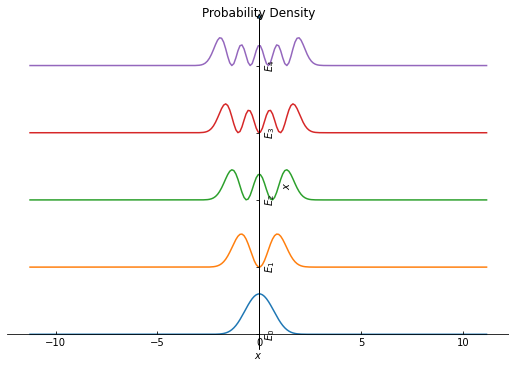

In [ ]:
# Wavefunction plot
n_list=np.arange(0,n)
fig=plt.figure(figsize=(9,6))
ax = axisartist.Subplot(fig, 111) 
#ax = plt.subplot(111)
fig.add_axes(ax)
for i in range(5):
    plt.plot((n_list-n/2)*dx,(wf_list2[:,i])**2*10+1*i,label=str(i))
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi_n(x)$')
plt.yticks([0,1,2,3,4],[r'$E_0$',r'$E_1$',r'$E_2$',r'$E_3$',r'$E_4$',r'$E_5$',r'$E_6$'])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.axis[:].set_visible(False)
ax.axis["y"] = ax.new_floating_axis(1,0)
ax.axis["y"].set_axisline_style("-|>", size = 1.0)
ax.axis["x"] = ax.new_floating_axis(0,0)
plt.title('Probability Density')
#plt.legend()

In [ ]:
E_list2[0:5]

array([0.51147286, 1.72527485, 3.18511689, 4.76094959, 6.43493922])